<a href="https://colab.research.google.com/github/prathamkandari/FASAL-FUSION/blob/randomforest/fasalfusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/sample_data/Crop_recommendation.csv')

# Explore the dataset
print(data.head())
print(data.info())


    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
None


**Data Visulization**

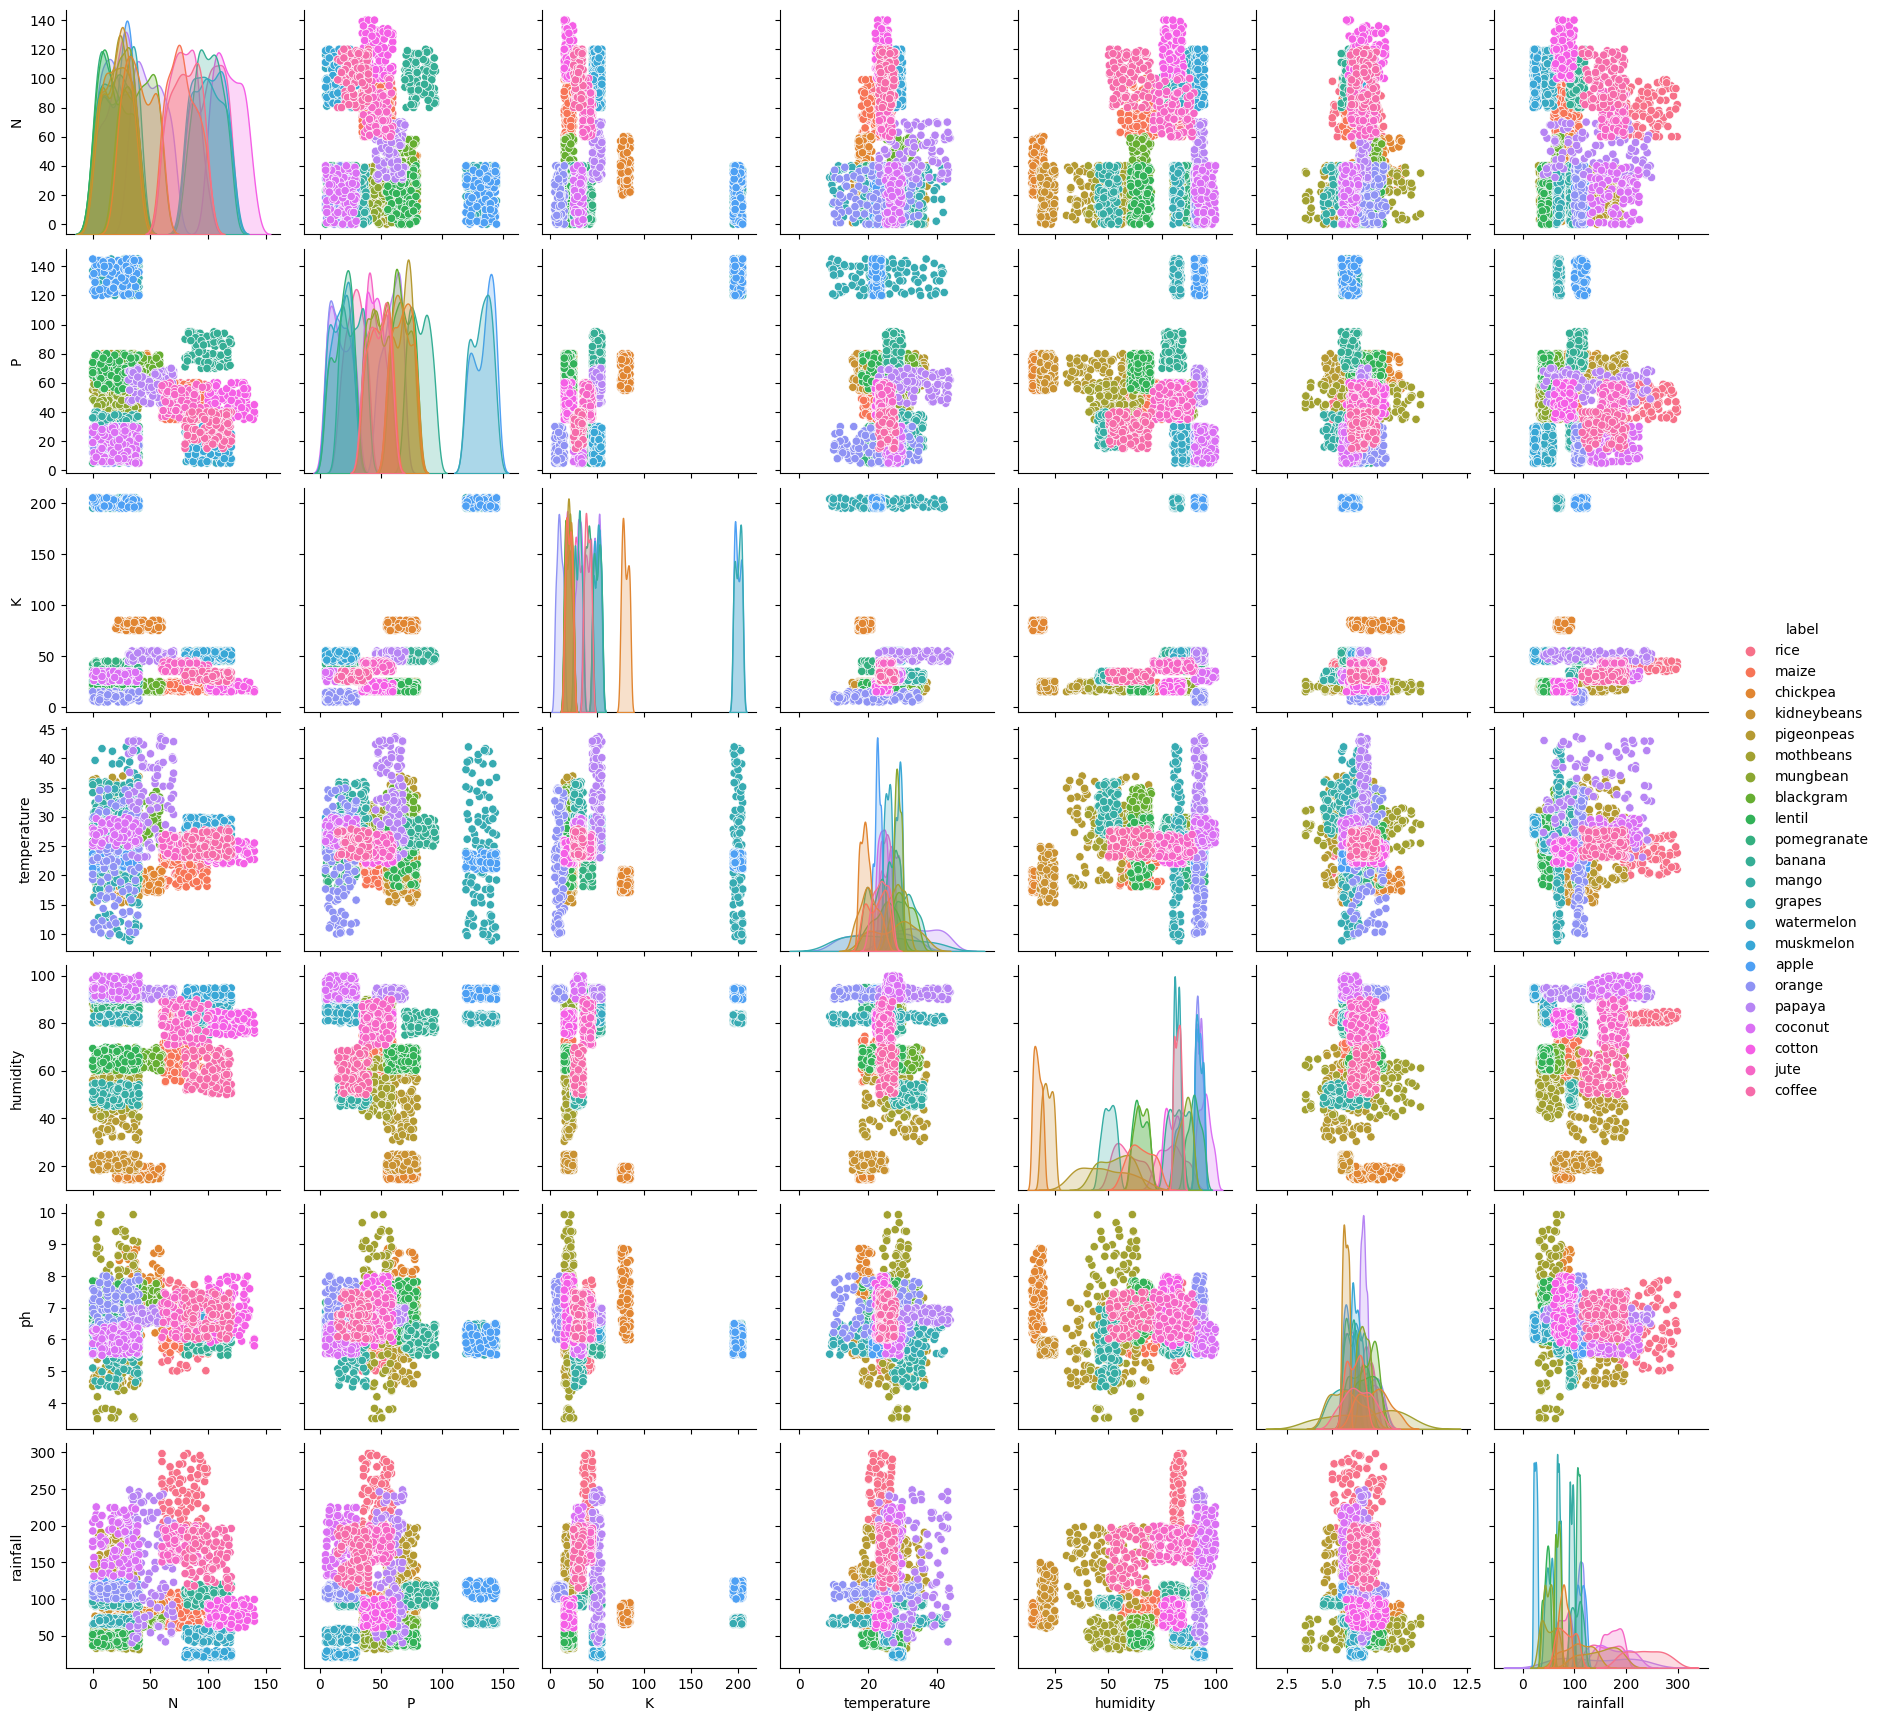

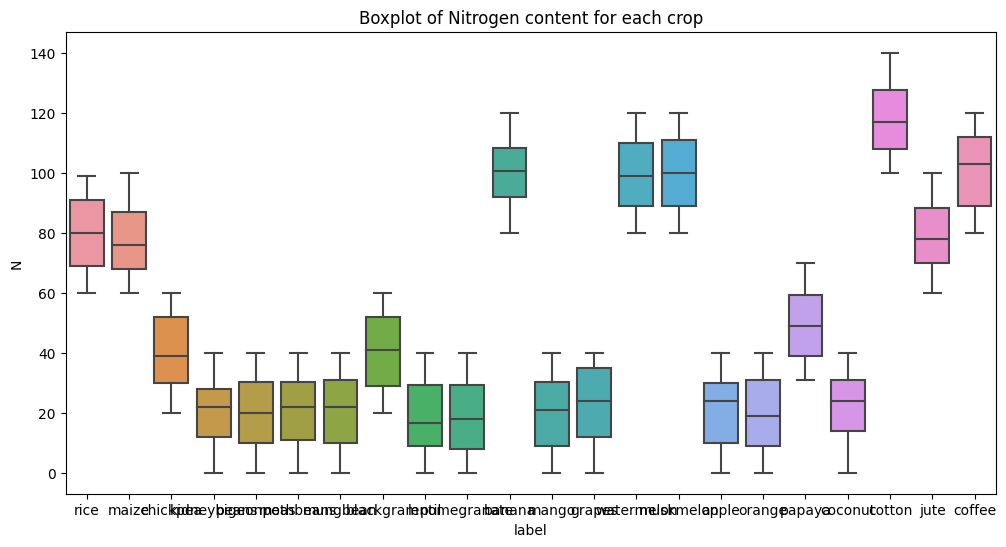

<ipython-input-3-f57ac0ab2615>:17: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


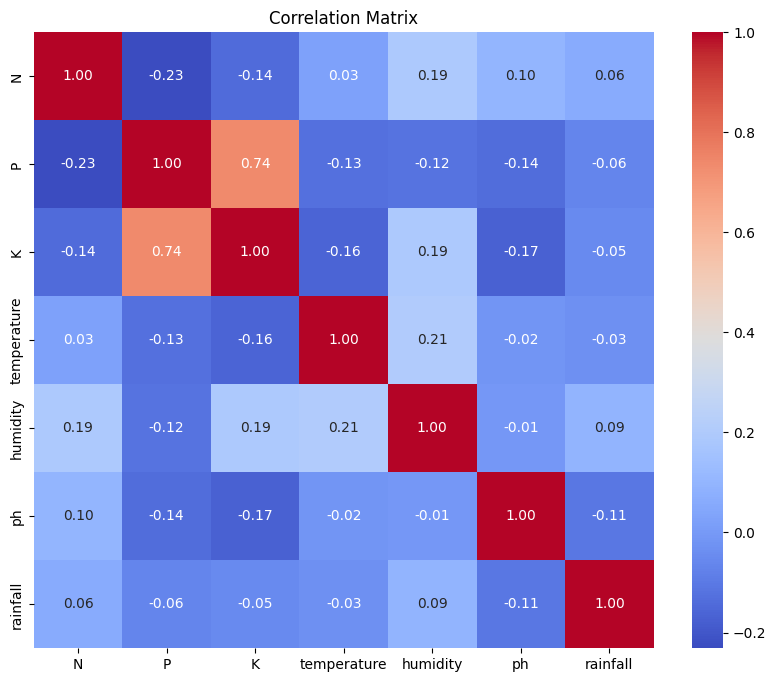

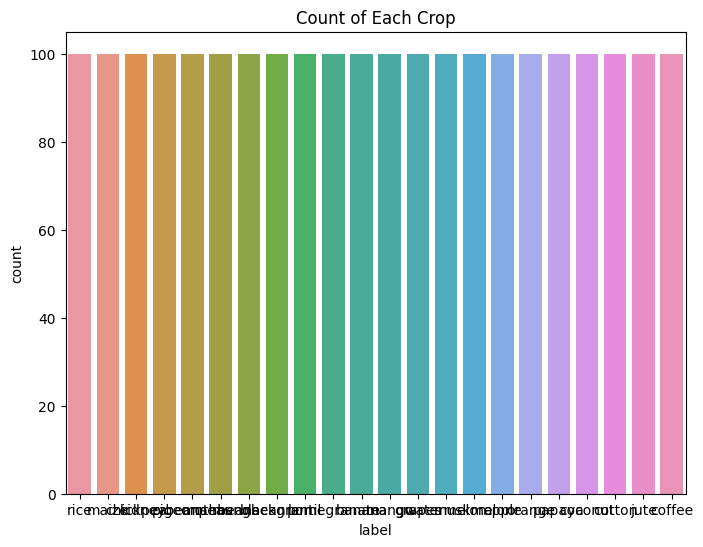

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your dataset

# Pairplot for numerical features
sns.pairplot(data, hue='label')
plt.show()

# Boxplot for numerical features
plt.figure(figsize=(12, 6))
sns.boxplot(x='label', y='N', data=data)
plt.title('Boxplot of Nitrogen content for each crop')
plt.show()

# Correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Countplot for the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='label', data=data)
plt.title('Count of Each Crop')
plt.show()


<ipython-input-15-9c66c156aa3c>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['label'] = le.fit_transform(subset_data['label'])
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


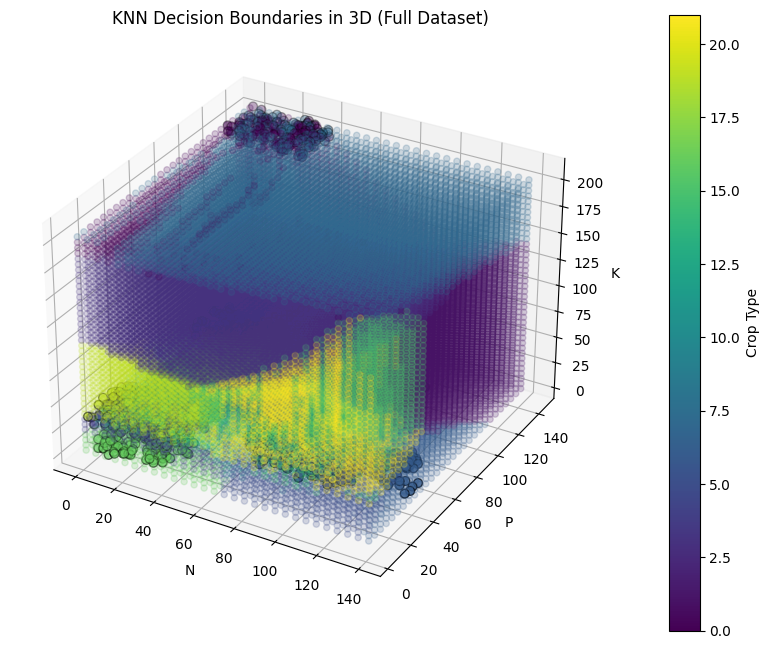

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D

# Assuming 'data' is your dataset
# Selecting three features (N, P, K) and the target variable (label)
selected_features = ['N', 'P', 'K', 'label']
subset_data = data[selected_features]

# Encoding the categorical target variable using .loc
le = preprocessing.LabelEncoder()
subset_data['label'] = le.fit_transform(subset_data['label'])

# Splitting features and target variable
X = subset_data[['N', 'P', 'K']]
y = subset_data['label']

# Creating KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Plotting decision boundaries in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Creating meshgrid for features with increased step size
x_min, x_max = X['N'].min() - 1, X['N'].max() + 1
y_min, y_max = X['P'].min() - 1, X['P'].max() + 1
z_min, z_max = X['K'].min() - 1, X['K'].max() + 1
xx, yy, zz = np.meshgrid(np.arange(x_min, x_max, 5.0),
                         np.arange(y_min, y_max, 5.0),
                         np.arange(z_min, z_max, 5.0))

# Predicting the class for each point in the meshgrid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel(), zz.ravel()])
Z = Z.reshape(xx.shape)

# Plotting the surface
scatter = ax.scatter(X['N'], X['P'], X['K'], c=y, cmap='viridis', edgecolor='k', s=40)
ax.scatter(xx, yy, zz, c=Z, cmap='viridis', alpha=0.2)

ax.set_xlabel('N')
ax.set_ylabel('P')
ax.set_zlabel('K')
ax.set_title('KNN Decision Boundaries in 3D (Full Dataset)')

# Add a colorbar to show the mapping from colors to crop types
colorbar = fig.colorbar(scatter, ax=ax, pad=0.1)
colorbar.set_label('Crop Type')

plt.show()


<ipython-input-23-1fdcfee4b7a7>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data['label'] = le.fit_transform(subset_data['label'])


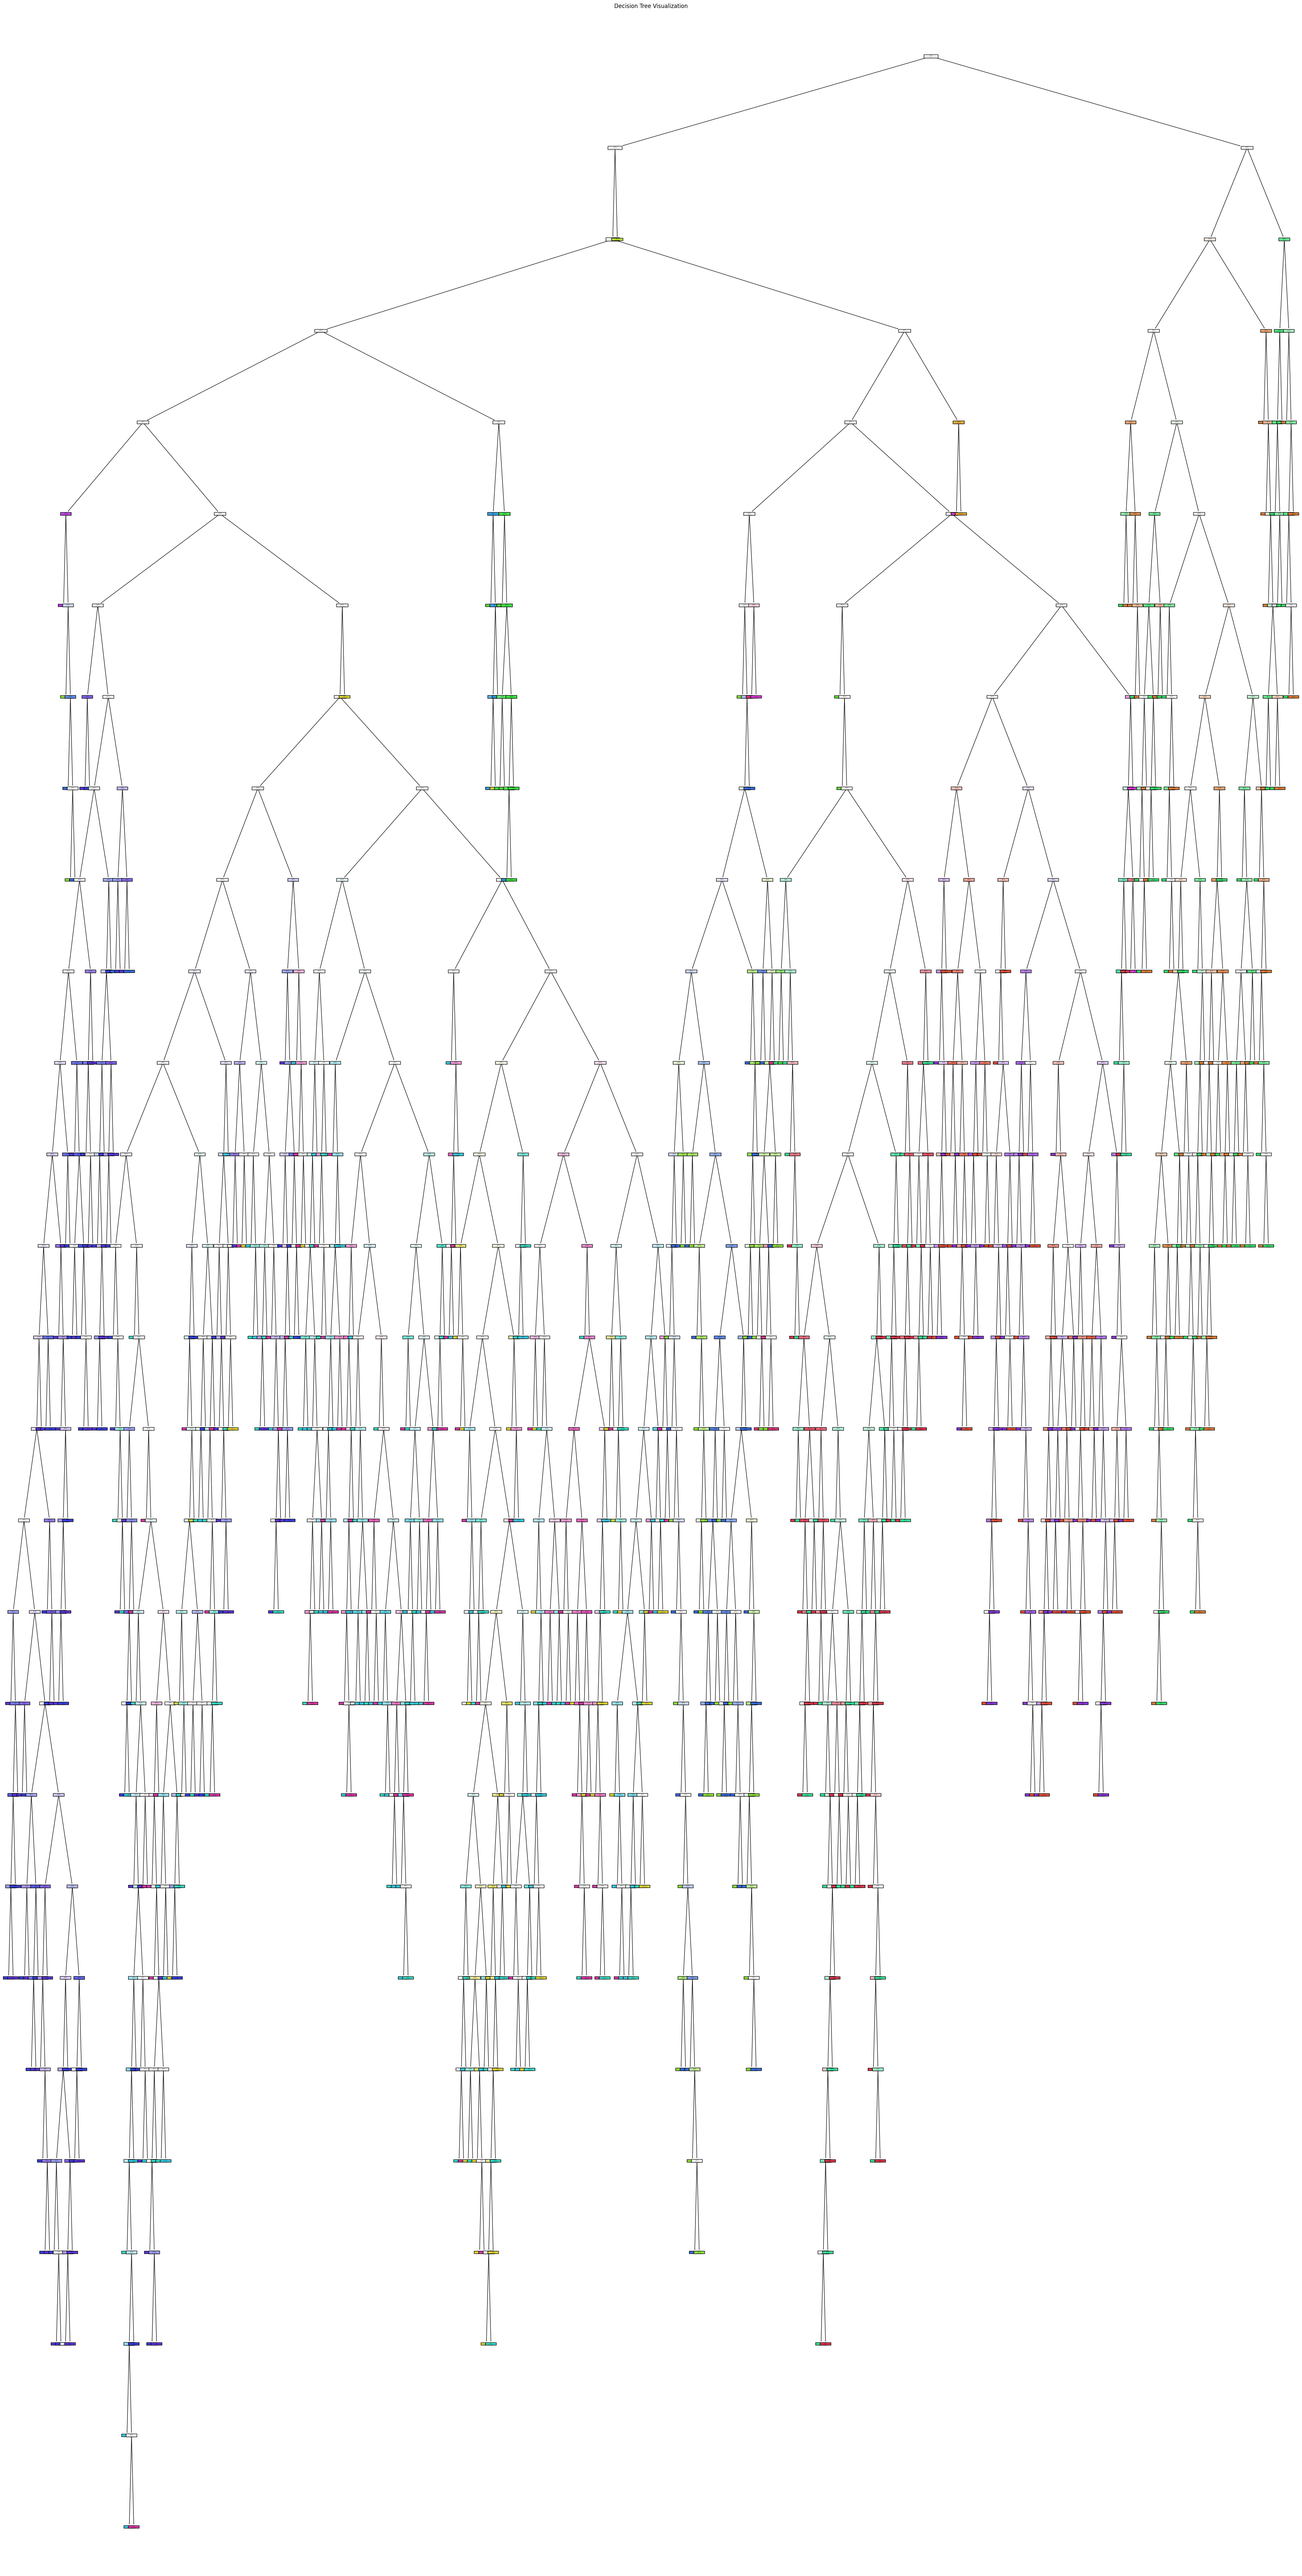

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# Assuming 'data' is your dataset
# Selecting three features (N, P, K) and the target variable (label)
selected_features = ['N', 'P', 'K', 'label']
subset_data = data[selected_features]

# Encoding the categorical target variable
le = preprocessing.LabelEncoder()
subset_data['label'] = le.fit_transform(subset_data['label'])

# Splitting features and target variable
X = subset_data[['N', 'P', 'K']]
y = subset_data['label']

# Creating Decision Tree classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X, y)

# Visualizing the decision tree
plt.figure(figsize=(50, 100))
plot_tree(dt_classifier, feature_names=X.columns, class_names=le.classes_, filled=True, rounded=True)
plt.title('Decision Tree Visualization')
plt.show()


**Data Split**

In [ ]:
from sklearn.model_selection import train_test_split
x = data.drop("label", axis=1)
y = data["label"]
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print(x_train)



        N    P    K  temperature   humidity        ph    rainfall
1102   21   26   27    27.003155  47.675254  5.699587   95.851183
1159   29   35   28    28.347161  53.539031  6.967418   90.402604
141    60   44   23    24.794708  70.045567  5.722580   76.728601
1004   80   77   49    26.054330  79.396545  5.519088  113.229737
2      60   55   44    23.004459  82.320763  7.840207  263.964248
...   ...  ...  ...          ...        ...       ...         ...
1638   10    5    5    21.213070  91.353492  7.817846  112.983436
1095  108   94   47    27.359116  84.546250  6.387431   90.812505
1130   11   36   31    27.920633  51.779659  6.475449  100.258567
1294   11  124  204    13.429886  80.066340  6.361141   71.400430
860    32   78   22    23.970814  62.355576  7.007038   53.409060

[1540 rows x 7 columns]


**Training All Model**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Create a dictionary to store models
models = {
    'Decision Tree': DecisionTreeClassifier(),
    'kNN': KNeighborsClassifier(),
    'SVM': SVC(),
    'AdaBoost': AdaBoostClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Train and evaluate each model
results = {}

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }

# Display the results
for name, metrics in results.items():
    print(f"\n{name}:\n{metrics}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Decision Tree:
{'Accuracy': 0.9848484848484849, 'Precision': 0.9850799633853108, 'Recall': 0.9848484848484849, 'F1 Score': 0.9847199795145989}

kNN:
{'Accuracy': 0.9772727272727273, 'Precision': 0.9794493575848915, 'Recall': 0.9772727272727273, 'F1 Score': 0.9771465899547762}

SVM:
{'Accuracy': 0.9636363636363636, 'Precision': 0.9680497543078188, 'Recall': 0.9636363636363636, 'F1 Score': 0.9631157521376901}

AdaBoost:
{'Accuracy': 0.2106060606060606, 'Precision': 0.15792664521337876, 'Recall': 0.2106060606060606, 'F1 Score': 0.1652242053301375}

Random Forest:
{'Accuracy': 0.9924242424242424, 'Precision': 0.9933954933954934, 'Recall': 0.9924242424242424, 'F1 Score': 0.9923123255113585}

Logistic Regression:
{'Accuracy': 0.9484848484848485, 'Precision': 0.9497654436304873, 'Recall': 0.9484848484848485, 'F1 Score': 0.9481941243531425}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(X_train, y_train)

predicted_values = RF.predict(X_test)

x = accuracy_score(y_test, predicted_values)
#acc.append(x)
#model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(y_test, predicted_values))


RF's Accuracy is:  0.9931818181818182
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      1.00      0.96        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.96      0.98        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.00

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Create and train the Decision Tree Classifier
DTC = DecisionTreeClassifier(random_state=0)
DTC.fit(X_train, y_train)

# Make predictions on the test set
predicted_values_dtc = DTC.predict(X_test)

# Calculate accuracy and other metrics
accuracy_dtc = accuracy_score(y_test, predicted_values_dtc)

# Append accuracy and model name to lists
#

# Print the accuracy and classification report
print("DTC's Accuracy is: ", accuracy_dtc)
print(classification_report(y_test, predicted_values_dtc))


DTC's Accuracy is:  0.9886363636363636
              precision    recall  f1-score   support

       apple       1.00      1.00      1.00        23
      banana       1.00      1.00      1.00        21
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        26
     coconut       1.00      1.00      1.00        27
      coffee       1.00      1.00      1.00        17
      cotton       1.00      1.00      1.00        17
      grapes       1.00      1.00      1.00        14
        jute       0.92      0.96      0.94        23
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.92      1.00      0.96        11
       maize       1.00      1.00      1.00        21
       mango       1.00      1.00      1.00        19
   mothbeans       1.00      0.92      0.96        24
    mungbean       1.00      1.00      1.00        19
   muskmelon       1.00      1.00      1.00        17
      orange       1.00      1.00      1.0

**Random Forest Python Algorithm**

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [7]:
path="/content/drive/MyDrive/Dataset/Crop_recommendation.csv"
df= pd.read_csv(path)
df.head(5)

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [9]:
# importing libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing datasets
data_set = pd.read_csv('/content/drive/MyDrive/Dataset/Crop_recommendation.csv')

# Extracting Independent and dependent Variable
X = data_set.iloc[:, 2:6].values  # Assuming columns 2 to 5 are your features
y = data_set.iloc[:, -1].values  # Assuming the last column is your label

# Splitting the dataset into training and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
# Fitting Random Forest classifier to the training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

# Encoding categorical labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Create a Random Forest classifier
classifier = RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0)

# Fit the classifier to the training set
classifier.fit(X_train, y_train_encoded)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [13]:
# Predicting the test set result
y_pred_encoded = classifier.predict(X_test)

# Decode the predicted labels to their original categorical form
y_pred = label_encoder.inverse_transform(y_pred_encoded)


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

# Creating the Confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred_encoded)

# Displaying the confusion matrix
print("Confusion Matrix:")
print(cm)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, y_pred_encoded)
print("\nAccuracy: {:.2f}%".format(accuracy * 100))

# Displaying the classification report
print("\nClassification Report:")
print(classification_report(y_test_encoded, y_pred_encoded))


Confusion Matrix:
[[24  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 20  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  4]
 [ 0  0 25  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 20  0  0  0  0  0  0  1  2  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 24  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 21  0  0  0  0  0  0  0  0  0  0  3  4  0]
 [ 0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5  0  0  0  0  0  0  0 10  2  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3 18  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 23  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  1  0 23  0  0  0  0  4  0  0  0]
 [ 0  0  0  0  0

<ipython-input-19-7648694e22cc>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
<ipython-input-19-7648694e22cc>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
<ipython-input-19-7648694e22cc>:24: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping

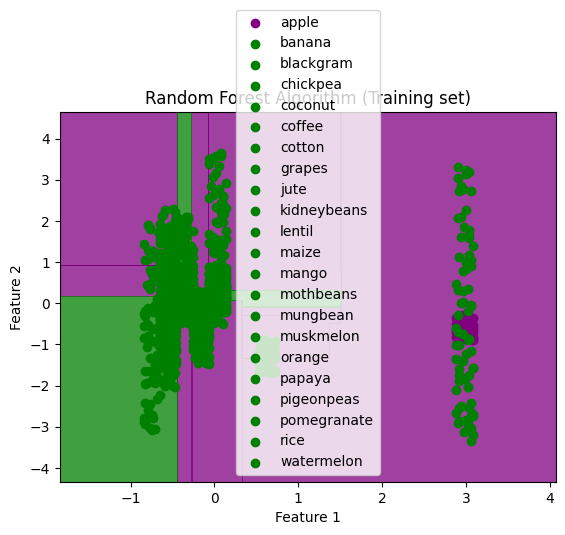

In [19]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Choose the features to visualize (assuming first two features)
x_set, y_set = X_train[:, :2], y_train_encoded

# Create a meshgrid for plotting decision boundary
x1, x2 = np.meshgrid(np.arange(start=x_set[:, 0].min() - 1, stop=x_set[:, 0].max() + 1, step=0.01),
                     np.arange(start=x_set[:, 1].min() - 1, stop=x_set[:, 1].max() + 1, step=0.01))

# Create a meshgrid with 4 features for predicting
meshgrid = np.array([x1.ravel(), x2.ravel(), np.zeros_like(x1.ravel()), np.zeros_like(x1.ravel())]).T

# Plot the decision boundary
plt.contourf(x1, x2, classifier.predict(meshgrid).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

# Set the plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c=ListedColormap(('purple', 'green'))(i), label=label_encoder.inverse_transform([j])[0])

# Add labels and legend
plt.title('Random Forest Algorithm (Training set)')
plt.xlabel('Feature 1')  # Replace with your actual feature names
plt.ylabel('Feature 2')  # Replace with your actual feature names
plt.legend()
plt.show()


<ipython-input-24-a8ad8166194c>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_test[y_test == label, 0], X_test[y_test == label, 1],


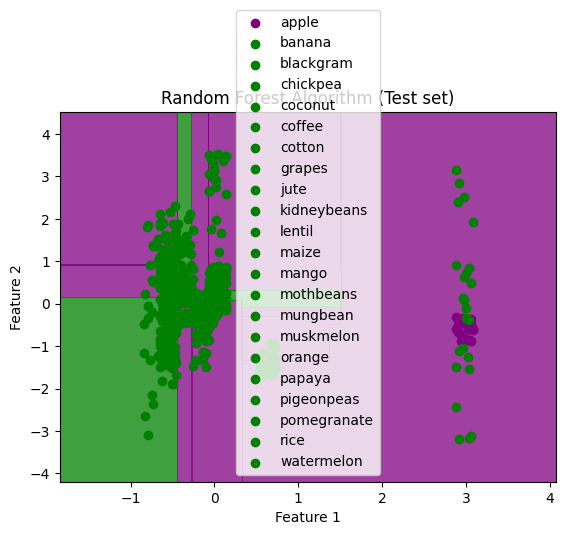

In [24]:
# Visualizing the test set result
from matplotlib.colors import ListedColormap
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid for plotting decision boundary
x1, x2 = np.meshgrid(np.arange(start=X_test[:, 0].min() - 1, stop=X_test[:, 0].max() + 1, step=0.01),
                     np.arange(start=X_test[:, 1].min() - 1, stop=X_test[:, 1].max() + 1, step=0.01))

# Create a meshgrid with 4 features for predicting
meshgrid = np.array([x1.ravel(), x2.ravel(), np.zeros_like(x1.ravel()), np.zeros_like(x1.ravel())]).T

# Plot the decision boundary
plt.contourf(x1, x2, classifier.predict(meshgrid).reshape(x1.shape),
             alpha=0.75, cmap=ListedColormap(('purple', 'green')))

# Set the plot limits
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())

# Plot the data points
for i, label in enumerate(np.unique(y_test)):
    plt.scatter(X_test[y_test == label, 0], X_test[y_test == label, 1],
                c=ListedColormap(('purple', 'green'))(i), label=label)

# Add labels and legend
plt.title('Random Forest Algorithm (Test set)')
plt.xlabel('Feature 1')  # Replace with your actual feature names
plt.ylabel('Feature 2')  # Replace with your actual feature names
plt.legend()
plt.show()
